# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import random
import cv2
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

# training_file = 'train.p'
training_file ='/home/oem/Documents/GitHub/CarND-Traffic-Sign-Classifier-Project/train.p'
testing_file = '/home/oem/Documents/GitHub/CarND-Traffic-Sign-Classifier-Project/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, Y_train = train['features'], train['labels']
X_test, Y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(Y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

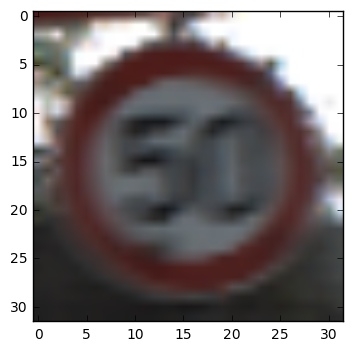

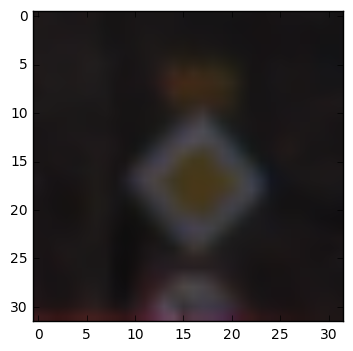

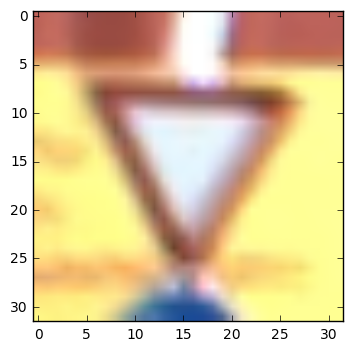

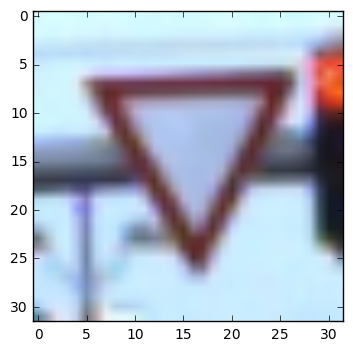

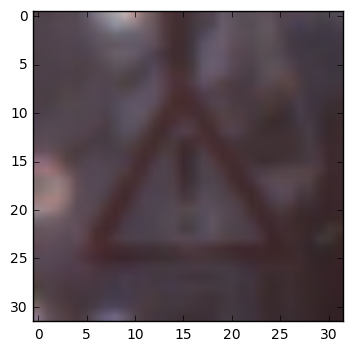

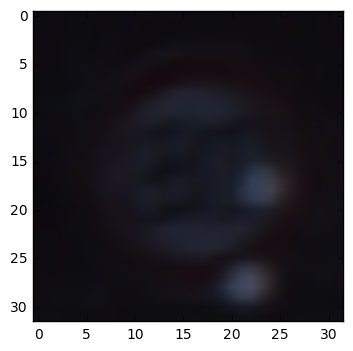

In [3]:
# split data

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.4, random_state=200)


# color conversion
x_train = []
x_test = []
x_val  = []
for image in X_train:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    x_train.append(image_gray)

for image in X_val:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    x_val.append(image_gray)

for image in X_test:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    x_test.append(image_gray)

x_train     = np.array(x_train)
x_val       = np.array(x_val)
x_test      = np.array(x_test)

y_val       = Y_val
y_test      = Y_test
y_train     = Y_train

# print(x_train.shape)
# keep grayscale image size the same as color image
x_train      = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_val        = x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)
x_test       = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)


### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
n_train = x_train.shape[0]
ImgInd = random.sample(range(0, n_train), 6)

# example plots
i=1
for indx in ImgInd:
    image = X_train[indx]
    plt.imshow(image)
    plt.show()
    i+=1
    


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x):
    # Deep Neural Network structure
    # Con1 - relu - Pooling - Con2 - relu - Pooling -
    # Fc3 - relu - Fc4 - relue - Fc5 -
    # softmax  -cross entropy - cost
    # Hyperparameters
    mu = 0
    sigma = 0.1
    channel_color_x = x.get_shape().as_list()[3]

    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    filter_size_width = 5
    filter_size_height = 5
    filter_depth = channel_color_x

    k_output = 6
    padding = 'VALID'
    strides = [1, 1, 1, 1]
    Fw1 = tf.Variable(tf.truncated_normal(shape = (filter_size_width,
          filter_size_height, filter_depth, k_output), mean = mu,
          stddev = sigma))
    Fb1 = tf.Variable(tf.zeros(k_output))
    hidden_layer1 = tf.nn.conv2d(x, Fw1, strides, padding) + Fb1

    # Activation.
    hidden_layer1 = tf.nn.relu(hidden_layer1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    hidden_layer1 = tf.nn.max_pool(hidden_layer1, ksize, strides, padding)
    keep_prob = 0.5
    hidden_layer1 = tf.nn.dropout(hidden_layer1, keep_prob)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    filter_size_width = 5
    filter_size_height = 5
    filter_depth = k_output
    k_output = 16
    padding = 'VALID'
    strides = [1, 1, 1, 1]
    Fw2 = tf.Variable(tf.truncated_normal( shape = (filter_size_width,
          filter_size_height, filter_depth, k_output), mean = mu, stddev = sigma))
    Fb2 = tf.Variable(tf.zeros(k_output))
    hidden_layer2 = tf.nn.conv2d (hidden_layer1, Fw2, strides, padding) + Fb2

    # Activation.
    hidden_layer2 = tf.nn.relu (hidden_layer2)


    # Pooling. Input = 10x10x16. Output = 5x5x16.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    hidden_layer2 = tf.nn.max_pool(hidden_layer2, ksize, strides, padding)
    keep_prob = 0.5
    # hidden_layer2 = tf.nn.dropout(hidden_layer2, keep_prob)


    # TODO: Flatten. Input = 5x5x16. Output = 400.
    hidden_layer2 = flatten(hidden_layer2)
    keep_prob = 0.5
    # hidden_layer2 = tf.nn.dropout(hidden_layer2, keep_prob)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    filter_size_len = hidden_layer2.get_shape().as_list()[1]
    k_output = 120
    Fw3 = tf.Variable(tf.truncated_normal(shape = (filter_size_len, k_output), mean = mu, stddev = sigma))
    Fb3 = tf.Variable(tf.zeros(k_output))
    hidden_layer3 = tf.matmul(hidden_layer2, Fw3) + Fb3
    # TODO: Activation.
    hidden_layer3 = tf.nn.relu(hidden_layer3)
    keep_prob = 0.5
    # hidden_layer3 = tf.nn.dropout(hidden_layer3, keep_prob)



    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    filter_size_len = k_output
    k_output  = 84
    Fw4 = tf.Variable(tf.truncated_normal(shape = (filter_size_len, k_output), mean = mu, stddev = sigma))
    Fb4 = tf.Variable(tf.zeros(k_output))
    hidden_layer4 = tf.matmul(hidden_layer3, Fw4) + Fb4


    # TODO: Activation.
    hidden_layer4 = tf.nn.relu(hidden_layer4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    filter_size_len = k_output
    k_output  = n_classes
    Fw5 = tf.Variable(tf.truncated_normal(shape = (filter_size_len, k_output), mean = mu, stddev = sigma))
    Fb5 = tf.Variable(tf.zeros(k_output))
    hidden_layer5 = tf.matmul(hidden_layer4, Fw5) + Fb5

    logits = hidden_layer5

    return logits



# define training batch tensor size
x = tf.placeholder(tf.float32, (None, x_train.shape[1], x_train.shape[2], x_train.shape[3]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples




### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 1) conver image color from 3 channels (RGB) to grayscale (1 channel)
2)shuffle the data
3)split training data into training date and validation data. Keep test data.

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#  for code, please refer to above cells. 

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**validation data set is split from original training data set. 20% and 40% split ratio for validation data were tested. No significant difference observed.

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

###  Deep Neural Network structure (for code, please see the implementation cell)
    # Layer 1: Con1 - relu - Max pooling -  data dimension change: 32*32*1 --> 28*28*6 --> 14*14*6 
    # Layer 2: Con2 - relu - Max pooling -  data dimension change: 14*14*6 --> 10*10*16 --> 5*5*16 --> 400*1
    # Layer 3: Fc3 - relu - data dimension change: 400*1 --> 120*1 
    # Layer 4: Fc4 - relue - Fc5 -data dimension change: 84*1 --> 43*1 
    # softmax  -cross entropy - cost

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** This arichiture keeps similar as LeNet with modification of adding dropout in the first layer after pooling. Different locations to put dropout function were tested. No significant improvement observered.
Layer 1 and 2 are convolution layers with activation function of relu. max-pooling is used to further reduce image size 
Layer 3 and 4 are fully connected layer with activation function of relu
the output layer is generated from softmax function.
The size is summrized as follows

###  Deep Neural Network structure
    # Layer 1: Con1 - relu - Max pooling - Dropout  data dimension change: 32*32*1 --> 28*28*6 --> 14*14*6 
    # Layer 2: Con2 - relu - Max pooling -  data dimension change: 14*14*6 --> 10*10*16 --> 5*5*16 --> 400*1
    # Layer 3: Fc3 - relu - data dimension change: 400*1 --> 120*1 
    # Layer 4: Fc4 - relue - Fc5 -data dimension change: 84*1 --> 43*1 
    # softmax  -cross entropy - cost


In [6]:
### Train your model here.
### Feel free to use as many code cells as needed.


EPOCHS = 150
BATCH_SIZE = 128*2

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(x_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, 'lenet')
    print("Model saved")

# test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))




Training...

EPOCH 1 ...
Validation Accuracy = 0.180

EPOCH 2 ...
Validation Accuracy = 0.325

EPOCH 3 ...
Validation Accuracy = 0.447

EPOCH 4 ...
Validation Accuracy = 0.521

EPOCH 5 ...
Validation Accuracy = 0.575

EPOCH 6 ...
Validation Accuracy = 0.622

EPOCH 7 ...
Validation Accuracy = 0.641

EPOCH 8 ...
Validation Accuracy = 0.679

EPOCH 9 ...
Validation Accuracy = 0.690

EPOCH 10 ...
Validation Accuracy = 0.713

EPOCH 11 ...
Validation Accuracy = 0.726

EPOCH 12 ...
Validation Accuracy = 0.751

EPOCH 13 ...
Validation Accuracy = 0.765

EPOCH 14 ...
Validation Accuracy = 0.786

EPOCH 15 ...
Validation Accuracy = 0.797

EPOCH 16 ...
Validation Accuracy = 0.810

EPOCH 17 ...
Validation Accuracy = 0.833

EPOCH 18 ...
Validation Accuracy = 0.844

EPOCH 19 ...
Validation Accuracy = 0.839

EPOCH 20 ...
Validation Accuracy = 0.841

EPOCH 21 ...
Validation Accuracy = 0.849

EPOCH 22 ...
Validation Accuracy = 0.863

EPOCH 23 ...
Validation Accuracy = 0.876

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**AdamOptimizer is used, batch size 128*2, epochs: 150 - i tried several different numbers and 150 is the one it gets stable most of the times. learing rate is set at 0.001; rate of 0.0005 also studied. The improvement is not significant. weights are generated based on mu=0,stddv=0.1,

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** i started the neural network structure from LeNet and modified several things, hopefully to imporve the result, This modifications include: changing the relu function to dropout function, changing learning rate, changing the size of hidden layers, changing size of validation set. In most of cases, the validation accuracy could be up to 96-98%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [7]:
# load new data
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random

AllPics = os.listdir("NewPic/")

i=1
x_data_new = []
for pic in AllPics:
    image = mpimg.imread('NewPic/'+pic)
    resized = cv2.resize(image, (32,32), interpolation = cv2.INTER_AREA)
    # plt.subplot(3,3,i)
    # plt.imshow(resized, cmap = 'gray')
    i+=1
    x_data_new.append(resized)

x_data_new = np.array(x_data_new)
y_data_new = np.array([8, 1, 28, 9, 5, 14, 25, 3])

nb_new = len(y_data_new)
plt.figure(figsize=(nb_new,2))
x_train, y_train = shuffle(x_train, y_train)

# compare the new labled image and the train image to make sure the new image
# is correclty labeled.



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

8 images have been found. For the plotting code, see the following cell.
Things i could think to impact the classification:

1) Is it really a German traffic sign? I tried to search German traffic sign from google, not as easy as i thought. Finally i found several, some of which are pretty close to the train dataset. A few of them are are similar with those in training data, but not exactly the same. 

2) Will resizing the image from big to small impact the classification? the image is resized from original size to small. I am not sure how it impacts the result. I guess not.  

3) square shape vs rectangle size: now sure if the image get distorted, will it impact the classification. The reviewer suggest to refer a github code to resolve the issue. 

4) unknown reasons - background noises? 

In [8]:
n=1;
for i in range(nb_new):
    Ni = random.randint(0, len(x_train)-500)
    for j in range(Ni, len(x_train)):
        if y_data_new[i] == y_train[j]:
            img1 = x_train[j].squeeze()
            # print(img1.shape)
            img2 = x_data_new [i]
            plt.subplot(nb_new ,2,n)
            plt.imshow(img1, cmap = 'gray')
            plt.subplot(nb_new,2,n+1)
            plt.imshow(img2)
            n = n+2
            break

xnew = []
for image in x_data_new:
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    xnew.append(image_gray)

xnew = np.array(xnew)
x_data_newG = xnew.reshape(xnew.shape[0], xnew.shape[1], xnew.shape[2],1)

BATCH_SIZE = len(x_data_newG)
ktop = 3
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(x_data_newG, y_data_new)
    prediction = sess.run(correct_prediction, feed_dict={x: x_data_newG, y: y_data_new})
    logitsV = sess.run(tf.nn.softmax(logits), feed_dict={x: x_data_newG, y: y_data_new})
    OneHotY = sess.run(one_hot_y, feed_dict={y: y_data_new})
    TopKv = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=ktop), feed_dict={x: x_data_newG, y: y_data_new})
    print("Accuracy of New Image = {:.3f}".format(test_accuracy))




Accuracy of New Image = 0.125


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** Prediction to new images from the model is much worse to the prediction to the validation and test data sets. Possible reasons were discussed in the answer of question 6. in addition, the prediction is not consistent which depends on the initial conditions of the model. The prediction to stop sign are more accurate than others in general. The prediction to speed limit traffic sign is not stable. 

Does the actual sign fall into the top: 3 prediction, 1 - yes, 0 -no 
 [[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]


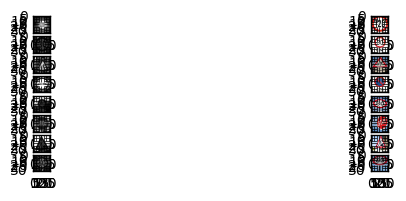

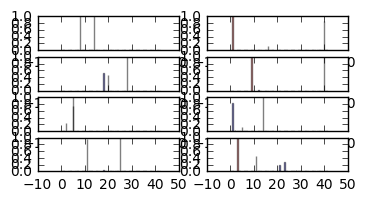

In [9]:
### Visualize the softmax probabilities here.

IsInTop =np.zeros([nb_new,1])

plt.figure(figsize=(4,2))

for i in range(x_data_newG.shape[0]):
    performance =logitsV[i,:]
    TrueValue = OneHotY[i,:]
    plt.subplot(4,2,i+1)
    axes = plt.bar(range(0,n_classes), performance, 0.2, align='center', alpha=0.5, color = 'blue')
    axes = plt.bar(np.array(range(0,n_classes)), TrueValue, 0.3, align='center', alpha=0.5, color = 'red')
    if y_data_new[i] in TopKv.indices[i,:]:
        IsInTop[i]=1
print("Does the actual sign fall into the top: {0} prediction, 1 - yes, 0 -no \n".format(ktop), IsInTop)
plt.show()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Only a few (1-2) pictures' prediction over 8 is accurate, which also depends on the training initial conditions in the deep-learning network. The accuracy of top 3 prediction is also low (1/8-3/8). One suspected reason is due to reshaping to square picture (32*32) whereas the original size of source picture is not square

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Does the actual sign fall into the top: 3 prediction, 1 - yes, 0 -no 
 [[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]]


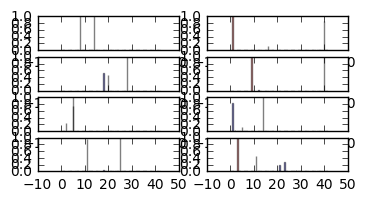

In [10]:
IsInTop =np.zeros([nb_new,1])

plt.figure(figsize=(4,2))

for i in range(x_data_newG.shape[0]):
    performance =logitsV[i,:]
    TrueValue = OneHotY[i,:]
    plt.subplot(4,2,i+1)
    axes = plt.bar(range(0,n_classes), performance, 0.2, align='center', alpha=0.5, color = 'blue')
    axes = plt.bar(np.array(range(0,n_classes)), TrueValue, 0.3, align='center', alpha=0.5, color = 'red')
    if y_data_new[i] in TopKv.indices[i,:]:
        IsInTop[i]=1
print("Does the actual sign fall into the top: {0} prediction, 1 - yes, 0 -no \n".format(ktop), IsInTop)
plt.show()
